In [1]:
import numpy as np
from langgraph.graph import StateGraph
from typing import TypedDict

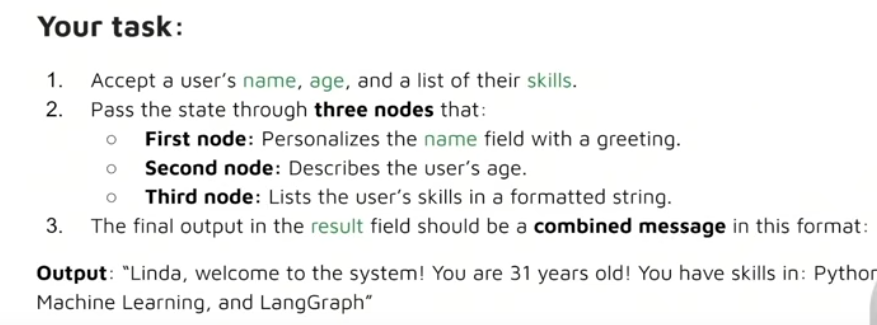

In [2]:
class AgentState(TypedDict):
    name : str
    age : int
    skills : list[str]
    result : str

In [18]:
def first_node(state:AgentState)->AgentState:

    state['result'] = f"Hi there {state['name']} !"
    return state

In [19]:
def second_node(state:AgentState)->AgentState:
    state['result'] = state['result'] + f" your Age is {state['age']}"
    return state

In [25]:
def third_node(state: AgentState) -> AgentState:
    # Format the skills list as a comma-separated string
    formatted_skills = ", ".join(state["skills"])
    state["result"] += f" User Skills: {formatted_skills}"
    return state


In [26]:
graph = StateGraph(AgentState)
graph.add_node("first_node",first_node)
graph.add_node("second_node",second_node)
graph.add_node("third_node",third_node)
graph.set_entry_point("first_node")
graph.add_edge("first_node","second_node")
graph.add_edge("second_node","third_node")
graph.set_finish_point("third_node")

app = graph.compile()

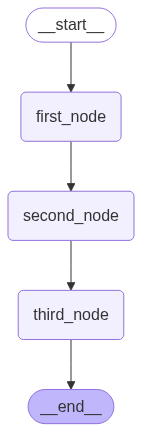

In [27]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))

In [28]:
result = app.invoke({"name":"xqz" , "age":21 , "skills" : ["twitter scrolling", "drinking water","walking"]})

In [29]:
result

{'name': 'xqz',
 'age': 21,
 'skills': ['twitter scrolling', 'drinking water', 'walking'],
 'result': 'Hi there xqz ! your Age is 21 User Skills: twitter scrolling, drinking water, walking'}